In [40]:
# Imports and Definitions
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Constants

# Define the Rabi oscillation function with damping
def Rabi(t, A, omega, T2, phi, C):
    """
    Rabi oscillation with damping.
    t: Time (independent variable)
    A: Amplitude of oscillation
    omega: Angular frequency of oscillation
    gamma: Damping factor
    phi: Phase shift
    C: Constant offset
    """
    return A * np.exp(-t/T2) * np.cos(omega * t + phi) + C

def Rabi_rate(Omega0, Delta):
    """
    Calculate the detuning based on the Rabi frequency and the detuning parameter.
    Omega0: Rabi frequency
    Delta: Detuning parameter
    """
    return np.sqrt(Omega0**2 + Delta**2)

def Rabi_rate_dV(Omega00, V, V0, alpha, beta):
    """
    Calculate the detuning based on the Rabi frequency and the detuning parameter.
    Omega0: Rabi frequency
    Delta: Detuning parameter
    """
    dV=V-V0
    Omega0=Omega00+mhz_to_rad_ns(beta*dV)
    Delta=mhz_to_rad_ns(alpha*dV)
    return np.sqrt(Omega0**2 + Delta**2)

def Rabi_amp_dV(A0, Omega00, V, V0,alpha,beta):
    """
    Calculate the amplitude based on the initial amplitude.
    A0: Initial amplitude
    """
    dV=V-V0
    Omega0=Omega00+mhz_to_rad_ns(beta*dV)
    Omega=Rabi_rate_dV(Omega00, V, V0, alpha, beta)
    return A0 * Omega0**2/Omega**2*abs(V/V0)

def mhz_to_rad_ns(frequency_mhz):
    """
    Convert frequency from MHz to angular frequency in rad/ns.
    frequency_mhz: Frequency in MHz
    Returns: Angular frequency in rad/ns
    """
    return 2 * np.pi * frequency_mhz / 1e3

def rad_ns_to_mhz(omega):
    """
    Convert angular frequency from rad/ns to MHz.
    omega: Angular frequency in rad/ns
    Returns: Frequency in MHz
    """
    return omega / (2 * np.pi) * 1e3


In [41]:
# Test Plotting
V=np.linspace(-90,-30,121) # mV


In [48]:
# Create Datasets
V0=-60
tau=np.linspace(0, 60, 121)  # ns
V=np.linspace(-90,-30,121) # mV
Omega00=0.34 # ns/rad
dV=V-V0 # mV
A0=22 # a.u. 
phi=0 # rad
#T2=40 # ns
alpha=1.8 # MHz/mV
beta=-0.7 # MHz/mV

# Build a scatter Rate
e = 1.602176634e-19  # Elementary charge in Coulombs
Gamma0=-0.0233126 # 1/ns
p=1.8 # probability of an electron causing a T2 event
G=0.08333333 # nS
Gamma=Gamma0+p/e*abs(G*V)*(1e-9*1e-12)
T2=1/Gamma # ns

I=np.zeros((len(tau), len(V)))
for i, t in enumerate(tau):
    for j, d in enumerate(V):
        A=Rabi_amp_dV(A0, Omega00, d, V0, alpha, beta)
        Omega=Rabi_rate_dV(Omega00, d, V0, alpha, beta)
        I[i,j] = Rabi(t, A, Omega,T2[j], phi, 0)




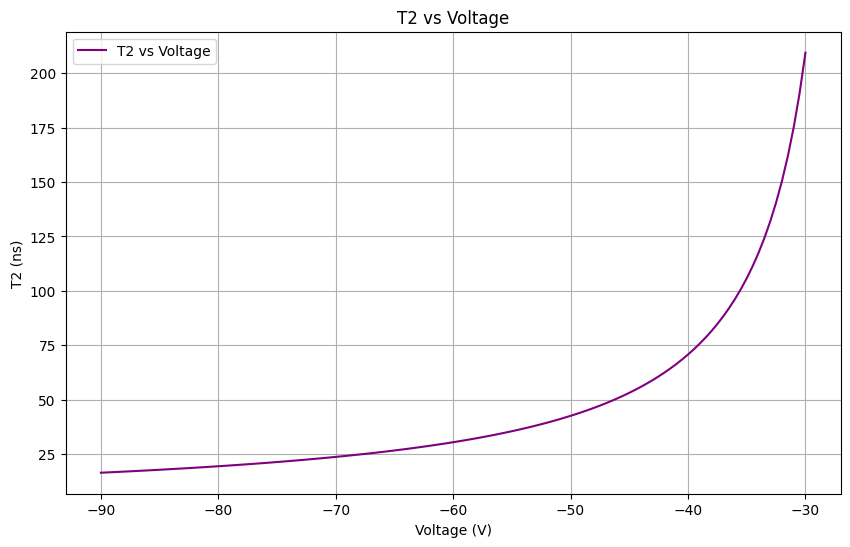

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(V, T2, label='T2 vs Voltage', color='purple')
plt.xlabel('Voltage (V)')
plt.ylabel('T2 (ns)')
plt.title('T2 vs Voltage')
plt.legend()
plt.grid()
plt.show()

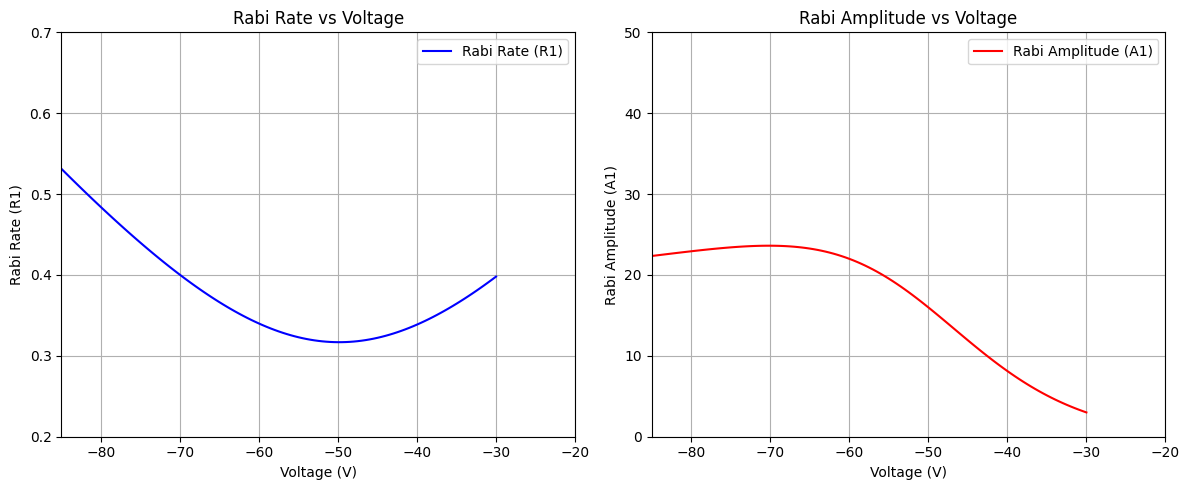

In [51]:
# Test Plotting
A1=Rabi_amp_dV(A0, Omega00, V, V0, alpha, beta)
R1=Rabi_rate_dV(Omega00, V, V0, alpha, beta)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot R1
axs[0].plot(V, R1, label='Rabi Rate (R1)', color='blue')
axs[0].set_xlabel('Voltage (V)')
axs[0].set_ylabel('Rabi Rate (R1)')
axs[0].set_title('Rabi Rate vs Voltage')
axs[0].legend()
axs[0].grid()
axs[0].set_ylim(0.2, 0.7)
axs[0].set_xlim(-85, -20)

# Plot A1
axs[1].plot(V, A1, label='Rabi Amplitude (A1)', color='red')
axs[1].set_xlabel('Voltage (V)')
axs[1].set_ylabel('Rabi Amplitude (A1)')
axs[1].set_title('Rabi Amplitude vs Voltage')
axs[1].legend()
axs[1].grid()
axs[1].set_ylim(0, 50)
axs[1].set_xlim(-85, -20)

plt.tight_layout()
plt.show()

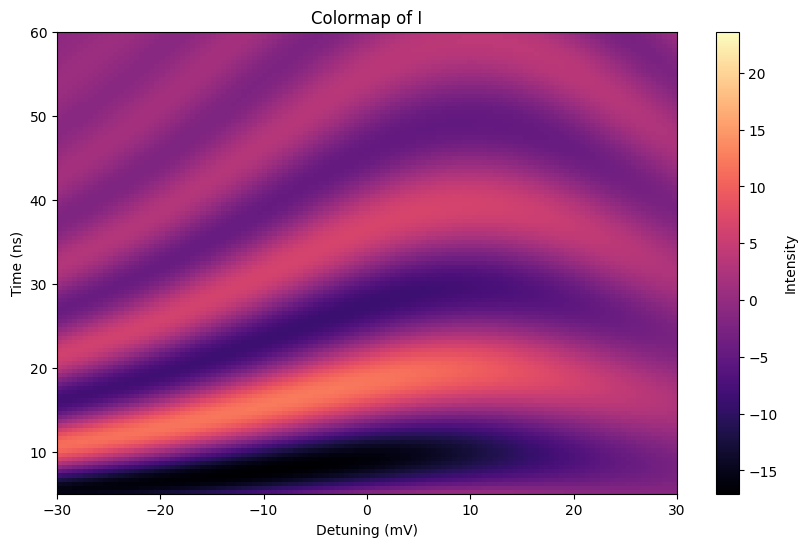

In [52]:
plt.figure(figsize=(10, 6))
plt.imshow(I, extent=[dV[0], dV[-1], tau[0], tau[-1]], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')
plt.set_cmap('magma')
plt.xlabel('Detuning (mV)')
plt.ylabel('Time (ns)')
plt.title('Colormap of I')
plt.ylim(5, 60)
plt.show()